In [3]:
# 1 建立工程，导入sklearn 相关工具包
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold
from sklearn.manifold import TSNE
import numpy as np

In [4]:
# 2 加载数据进行处理
data = pd.read_csv("abalone.csv")
print(data.shape)
data

(4177, 9)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
label=data['Sex']
print(label)

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object


In [6]:
import csv
with open(r'mylabel.tsv', 'w', newline='') as f:
    tsv_w = csv.writer(f, delimiter='\t')
    tsv_w.writerow(['A1', 'A2', 'A3'])  
    tsv_w.writerows(np.array(label).tolist())  # 多行写入

In [8]:
data_drop = data.drop(['Sex'],axis=1)
print(data_drop)

      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell weight  Rings  
0          

In [13]:
with open(r'mydata.tsv', 'w', newline='') as f:
    tsv_w = csv.writer(f, delimiter='\t')
    tsv_w.writerow(['A1', 'A2', 'A3'])  
    tsv_w.writerows(np.array(data_drop).tolist())  # 多行写入

In [3]:
y = data['Sex']#label
X = data.drop('Sex',axis=1, inplace=False).values#输入数据
print(X.shape)

(4177, 8)


In [4]:
# 3 查看数据相关性
#pd.plotting.scatter_matrix(data, figsize=( 12, 8))

In [5]:
#散度矩阵
data.corr()
data.corr().applymap( lambda x: int(x* 100)/ 100)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.00,0.98,0.82,0.92,0.89,0.90,0.89,0.55
Diameter,0.98,1.00,0.83,0.92,0.89,0.89,0.90,0.57
Height,0.82,0.83,1.00,0.81,0.77,0.79,0.81,0.55
Whole weight,0.92,0.92,0.81,1.00,0.96,0.96,0.95,0.54
Shucked weight,0.89,0.89,0.77,0.96,1.00,0.93,0.88,0.42
Viscera weight,0.90,0.89,0.79,0.96,0.93,1.00,0.90,0.50
Shell weight,0.89,0.90,0.81,0.95,0.88,0.90,1.00,0.62
Rings,0.55,0.57,0.55,0.54,0.42,0.50,0.62,1.00


PCA 的算法步骤：

设有 m 条 n 维数据。

将原始数据按列组成 n 行 m 列矩阵 X；

将 X 的每一行进行零均值化，即减去这一行的均值；

求出协方差矩阵 [公式] ；

求出协方差矩阵的特征值及对应的特征向量；

将特征向量按对应特征值大小从上到下按行排列成矩阵，取前 k 行组成矩阵 P；

[公式] 即为降维到 k 维后的数据。

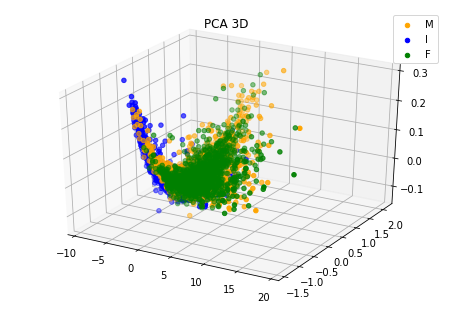

In [6]:
# 4 PCA降维
#绘制三维分类图
pca = PCA(n_components=3)  # 实例化
reduced_x = pca.fit_transform(X)  # 拟合模型 获取新矩阵
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(reduced_x[y == "M", 0], reduced_x[y == "M", 1],reduced_x[y == "M", 2], c="orange", label="M")
ax.scatter(reduced_x[y == "I", 0], reduced_x[y == "I", 1],reduced_x[y == "I", 2] ,c="blue", label="I")
ax.scatter(reduced_x[y == "F", 0], reduced_x[y == "F", 1],reduced_x[y == "F", 2], c="green", label="F")
plt.legend()  # 显示图例
plt.title("PCA 3D")  # 显示标题
plt.show()

MDS（多维缩放）降维是一组对象之间的距离的可视化表示，也可以当做一种无监督降维算法使用。而Isomap（等度量映射）是在MDS算法的基础上衍生出的一种非迭代的全局优化算法，它是一种等距映射算法，也就是说降维后的点，两两之间距离不变
这个距离是测地距离。Isomap算法没有多少公式推导的内容，它的创新点是引入测地线距离和提出对应的距离计算方法。此算法出发点，是认识到流形在高维空间中，两个样本之间的距离不该直接使用欧式距离计算直线距离，更应该是采用“测地线”距离,就像我们日常生活中送快递的例子，两个城市之间如果没有直达的路线，快递就会经过许多中转站才能送到,Isomap 通过将数据点连接起来构成一个邻接 Graph 来离散地近似原来的流形，而测地距离也相应地通过 Graph 上的最短路径来近似了；

算法步骤：

1.对每个样本点x，计算它的k近邻；同时将x与它的k近邻的距离设置为欧氏距离，与其他点的距离设置为无穷大；

2.调用最短路径算法计算任意两个样本点之间的距离，获得距离矩阵D；

3.调用多维缩放MDS算法，获得样本集在低维空间中的矩阵Z；


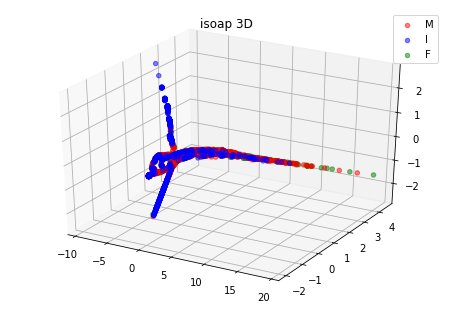

In [7]:
# 5 isomap降维
#绘制三维分类图
reduced_x = manifold.Isomap(n_neighbors = 300, n_components = 3).fit_transform(X)
fig=plt.figure("isomap")
#fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(reduced_x[y == "M", 0], reduced_x[y == "M", 1],reduced_x[y == "M", 2], marker='o',c="red", label="M",alpha=0.5)
ax.scatter(reduced_x[y == "I", 0], reduced_x[y == "I", 1], reduced_x[y == "I", 2],marker='o',c="blue", label="I",alpha=0.5)
ax.scatter(reduced_x[y == "F", 0], reduced_x[y == "F", 1], reduced_x[y == "F", 2],marker='o',c="green", label="F",alpha=0.5)
plt.legend()  # 显示图例
plt.title("isoap 3D")  # 显示标题
plt.show()

<Figure size 432x288 with 0 Axes>

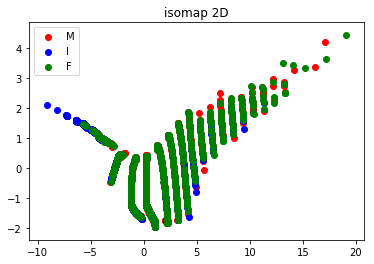

In [8]:
# 绘制二维分类图
reduced_x = manifold.Isomap(n_neighbors = 300, n_components = 2).fit_transform(X)
fig=plt.figure("isomap")
fig = plt.figure()

plt.scatter(reduced_x[y == "M", 0], reduced_x[y == "M", 1], c="red", label="M")
plt.scatter(reduced_x[y == "I", 0], reduced_x[y == "I", 1], c="blue", label="I")
plt.scatter(reduced_x[y == "F", 0], reduced_x[y == "F", 1], c="green", label="F")
plt.legend()  # 显示图例
plt.title("isomap 2D")  # 显示标题
plt.show()

<Figure size 432x288 with 0 Axes>

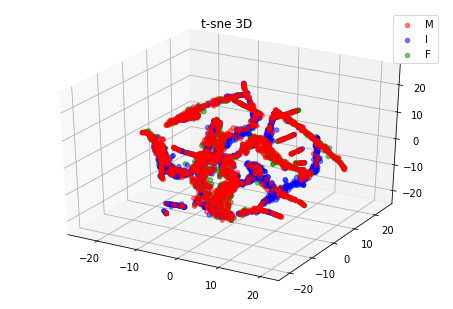

In [9]:
# 6 Tsne降维
#绘制三维分类图
reduced_x = TSNE(n_components=3,learning_rate=100).fit_transform(X)
fig=plt.figure("isomap")
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(reduced_x[y == "M", 0], reduced_x[y == "M", 1],reduced_x[y == "M", 2], marker='o',c="red", label="M",alpha=0.5)
ax.scatter(reduced_x[y == "I", 0], reduced_x[y == "I", 1], reduced_x[y == "I", 2],marker='o',c="blue", label="I",alpha=0.5)
ax.scatter(reduced_x[y == "F", 0], reduced_x[y == "F", 1], reduced_x[y == "F", 2],marker='o',c="green", label="F",alpha=0.5)
plt.legend()  # 显示图例
plt.title("t-sne 3D")  # 显示标题
plt.show()


<Figure size 432x288 with 0 Axes>

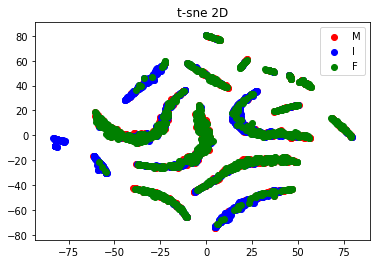

In [10]:
# 绘制二维分类图
reduced_x = TSNE(n_components=2,learning_rate=100).fit_transform(X)
fig=plt.figure("isomap")
fig = plt.figure()

plt.scatter(reduced_x[y == "M", 0], reduced_x[y == "M", 1], c="red", label="M")
plt.scatter(reduced_x[y == "I", 0], reduced_x[y == "I", 1], c="blue", label="I")
plt.scatter(reduced_x[y == "F", 0], reduced_x[y == "F", 1], c="green", label="F")
plt.legend()  # 显示图例
plt.title("t-sne 2D")  # 显示标题
plt.show()